In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
fileName = "xid-92685698_2.txt" 
df = pd.read_csv(fileName, delim_whitespace=True) 
df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0


In [3]:
df_w = df[["DPD","APD","MWD","WTMP","WVHT"]]
df_w.head()

,DPD,APD,MWD,WTMP,WVHT
0,12.50,7.69,269,15.3,1.12
1,11.76,7.34,272,15.3,1.16
2,12.50,7.08,268,15.3,1.20
3,10.53,7.33,268,15.4,1.25
4,10.53,7.57,268,15.5,1.27


In [12]:
df_w1 = df_w.drop(df_w[df_w['DPD'] == 99.0].index)
df_w2 = df_w1.drop(df_w1[df_w1['APD'] == 99.0].index)
df_w3 = df_w2.drop(df_w2[df_w2['MWD'] == 999.0].index)
df_w4 = df_w3.drop(df_w3[df_w3['WTMP'] == 99.0].index)
df_w5 = df_w4.drop(df_w4[df_w4['WVHT'] == 99.0].index)

In [13]:
pca = PCA(n_components=5)
pca.fit(df_w5)

PCA(n_components=5)

In [14]:
print(pca.explained_variance_ratio_)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]


In [15]:
print(np.abs(pca.components_))

[[0.03483275 0.00632252 0.99911854 0.02217264 0.00414966]
 [0.92292703 0.35324348 0.02653793 0.14807698 0.02817253]
 [0.14552072 0.03477188 0.02692689 0.98767311 0.03730158]
 [0.35382026 0.92602029 0.01817485 0.02485407 0.12786551]
 [0.02504633 0.12828252 0.00158002 0.03828429 0.99068062]]


In [16]:
plotData = pca.transform(df_w5)

In [17]:
print(plotData)

[[-3.48462047e+01 -1.88830218e+00  8.49056649e-01  5.17319217e-02
  -1.50007507e-01]
 [-3.78672897e+01 -1.16244165e+00  8.89623549e-01 -5.99581235e-02
  -8.87557303e-02]
 [-3.38435614e+01 -1.64853953e+00  9.00178509e-01 -4.84736362e-01
   9.07929857e-03]
 ...
 [-3.38054626e+01 -3.41716798e+00 -7.99025252e-01  2.50130397e+00
   2.33069517e-01]
 [-3.67677012e+01 -4.31554546e+00 -1.01809607e+00  1.92380578e+00
   1.46676320e-01]
 [-3.68293916e+01 -2.72753885e+00 -8.62539037e-01  2.76846855e+00
   1.17076888e-01]]


In [18]:
pca.components_

array([[ 0.03483275, -0.00632252, -0.99911854,  0.02217264, -0.00414966],
       [-0.92292703, -0.35324348, -0.02653793,  0.14807698, -0.02817253],
       [-0.14552072, -0.03477188, -0.02692689, -0.98767311,  0.03730158],
       [-0.35382026,  0.92602029, -0.01817485,  0.02485407,  0.12786551],
       [ 0.02504633, -0.12828252, -0.00158002,  0.03828429,  0.99068062]])

Text(0, 0.5, 'PC2')

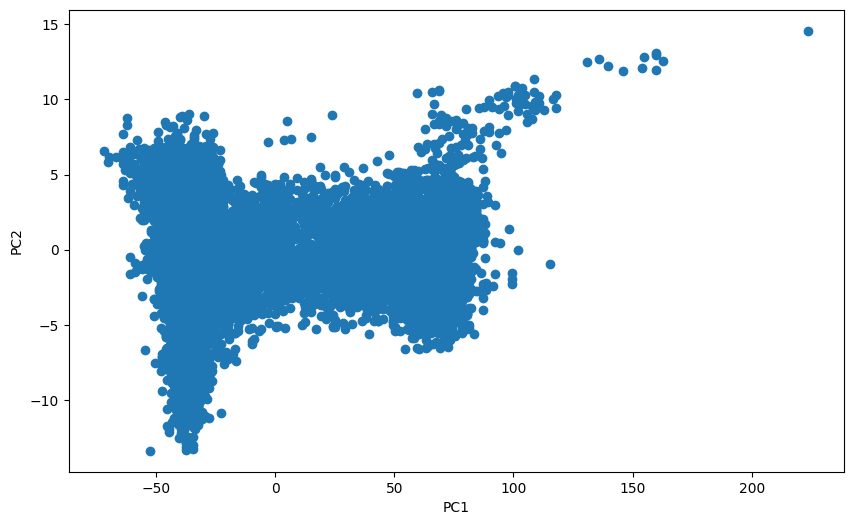

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(plotData[:,0],plotData[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')